In [1]:
from glob import glob
image_dir = './MPII/images'
image_data = glob(f'{image_dir}/*.jpg')
print(len(image_data))

24984


In [2]:
import json

# JSON 파일 경로
file_path = './MPII/annotation/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_2/train.json'

# 파일 열기 및 읽기
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 데이터 출력 (필요 시 확인)
print(data[0])

check = []
for i in range(len(data)):
    check.append(data[i]['image'])

test_image = []
for i in range(len(check)):
    if check.count(check[i]) == 1:
        temp = image_dir + '/' + check[i]
        if temp in image_data:
            test_image.append(temp)
print(len(test_image))

{'joints_vis': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'joints': [[620.0, 394.0], [616.0, 269.0], [573.0, 185.0], [647.0, 188.0], [661.0, 221.0], [656.0, 231.0], [610.0, 187.0], [647.0, 176.0], [637.0201, 189.8183], [695.9799, 108.1817], [606.0, 217.0], [553.0, 161.0], [601.0, 167.0], [692.0, 185.0], [693.0, 240.0], [688.0, 313.0]], 'image': '015601864.jpg', 'scale': 3.021046, 'center': [594.0, 257.0]}
10298


In [3]:
test_image.sort()
print(test_image[0])

./MPII/images/000004812.jpg


In [4]:
test_label = []
for i in range(len(test_image)):
    for j in range(len(data)):
        if test_image[i].split('/')[-1] == data[j]['image']:
            test_label.append({'name' : data[j]['image'], 'label' : data[j]['joints'], 'scale' : data[j]['scale'], 'center' : data[j]['center']})

In [58]:
test_image_100 = test_image[:1000]
test_label_100 = test_label[:1000]

In [59]:
print(test_image_100[:20])
print(test_label_100[:20])

['./MPII/images/000004812.jpg', './MPII/images/000013469.jpg', './MPII/images/000015774.jpg', './MPII/images/000024100.jpg', './MPII/images/000030708.jpg', './MPII/images/000033016.jpg', './MPII/images/000041029.jpg', './MPII/images/000059794.jpg', './MPII/images/000065339.jpg', './MPII/images/000111209.jpg', './MPII/images/000114595.jpg', './MPII/images/000131987.jpg', './MPII/images/000144722.jpg', './MPII/images/000165249.jpg', './MPII/images/000170503.jpg', './MPII/images/000187274.jpg', './MPII/images/000208064.jpg', './MPII/images/000234747.jpg', './MPII/images/000245459.jpg', './MPII/images/000249545.jpg']
[{'name': '000004812.jpg', 'label': [[1410.0, 992.0], [1391.0, 788.0], [1389.0, 525.0], [1360.0, 528.0], [1369.0, 783.0], [1401.0, 978.0], [1375.0, 527.0], [1603.0, 648.0], [1632.4033, 644.3409], [1798.5967, 623.6591], [1504.0, 975.0], [1552.0, 821.0], [1632.0, 667.0], [1574.0, 629.0], [1509.0, 778.0], [1458.0, 922.0]], 'scale': 5.024261, 'center': [1441.0, 721.0]}, {'name': '

## Ground Truth

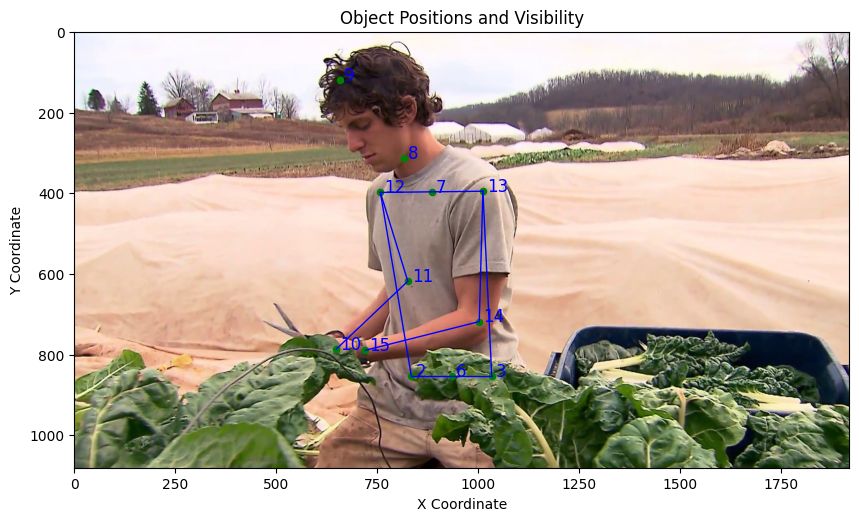

In [60]:
import matplotlib.pyplot as plt
import cv2

data = test_label[55]['label']
# 빈 리스트를 만들어서 x, y, id, visible 데이터를 분리
x_coords = [val[0] if val[0] != -1 else 0 for val in data]
y_coords = [val[1] if val[1] != -1 else 0 for val in data]
ids = [i if x_coords[i] != 0 else 0 for i in range(16)]
# visibilities = [int(v[0]) if v.size > 0 else 0 for v in data['is_visible']]

# 배경 이미지 로드 (파일 경로를 변경)
background_image_path = f'{test_image[55]}'  # 사용하고자 하는 이미지 파일 경로를 입력하세요.
# background_image_path = './MPII/images/068325876.jpg'
background = cv2.imread(background_image_path)

# 이미지가 정상적으로 불러와졌는지 확인
if background is None:
    raise ValueError("배경 이미지를 불러올 수 없습니다. 파일 경로를 확인하세요.")

# 이미지를 RGB로 변환 (OpenCV는 BGR로 이미지를 읽기 때문에, plt에서는 RGB로 변환 필요)
background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

# Plot 설정
plt.figure(figsize=(10, 8))

# 배경 이미지 표시
plt.imshow(background_rgb)

# 가시성에 따라 점을 색으로 구분
for i, (x, y, obj_id) in enumerate(zip(x_coords, y_coords, ids)):
    color = 'green'  # 가시성이 있으면 초록색, 없으면 빨간색
    if x != 0:
        plt.scatter(x, y, color=color, s=20)  # 좌표에 점을 찍음
        plt.text(x + 10, y, str(obj_id), fontsize=12, color='blue')  # 점 옆에 ID를 표시

# 이을 점들의 ID 쌍을 정의 (여기에 원하는 쌍을 설정)
connect_pairs = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (2, 12), (12, 13), (13, 3), (12, 11), (11, 10), (13, 14), (14, 15)]  # 예: 0-1, 1-2, 2-3 연결

# ID에 따라 좌표를 선으로 연결
for (id1, id2) in connect_pairs:
    if id1 in ids and id2 in ids:  # 두 ID 모두 존재하면 선을 그림
        idx1 = ids.index(id1)
        idx2 = ids.index(id2)
        plt.plot([x_coords[idx1], x_coords[idx2]], [y_coords[idx1], y_coords[idx2]], color='blue', linewidth=1)

# 그래프 설정
plt.title('Object Positions and Visibility')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)  # 그리드 비활성화 (이미지 위에서는 불필요)
plt.xlim([0, background.shape[1]])  # X축 범위는 이미지의 폭에 맞춤
plt.ylim([background.shape[0], 0])  # Y축 범위는 이미지의 높이에 맞추되, 이미지의 좌표계와 맞추기 위해 반전

# 그래프 출력
plt.show()

## VIT POSE evaluation

In [61]:
from mmpose.apis import init_pose_model, inference_top_down_pose_model
from mmpose.datasets import DatasetInfo
import numpy as np

# ViTPose 모델 경로 설정
pose_config = './ViTPose/configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/mpii/ViTPose_base_mpii_256x192.py'
pose_checkpoint = './ViTPose/weights/vitpose-b-multi-mpii.pth'

# 모델 초기화
device = 'cuda:0'
pose_model = init_pose_model(pose_config, pose_checkpoint, device=device)

# 데이터셋 정보 불러오기
dataset_info = pose_model.cfg.data['test'].get('dataset_info', None)
if dataset_info is not None:
    dataset_info = DatasetInfo(dataset_info)

load checkpoint from local path: ./ViTPose/weights/vitpose-b-multi-mpii.pth


In [63]:
print(pose_model)

TopDown(
  (backbone): ViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), padding=(2, 2))
    )
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (1): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
       

In [64]:
import numpy as np
from mmpose.apis import init_pose_model, inference_top_down_pose_model
from mmpose.datasets import DatasetInfo
from tqdm import tqdm

# Bounding box를 계산하는 함수 (center와 scale로부터 계산)
def get_bbox_from_center_scale(center, scale):
    base_size = 200  # MP-II에서 사용되는 기준 크기
    w = h = base_size * scale
    
    # 좌상단 (x1, y1)와 우하단 (x2, y2) 계산
    x1 = center[0] - w / 2
    y1 = center[1] - h / 2
    x2 = center[0] + w / 2
    y2 = center[1] + h / 2
    
    return [x1, y1, x2, y2]

# PCK 계산 함수 (Bounding Box 크기를 기준으로 정규화)
def calculate_pck(predicted, ground_truth, bbox_size, threshold=0.5):
    """PCK (Percentage of Correct Keypoints) 계산 함수.
       Bounding Box 크기로 거리를 정규화하여 PCK를 계산합니다.
    """
    # predicted와 ground_truth 간의 거리 계산
    distances = np.linalg.norm(np.array(predicted) - np.array(ground_truth), axis=1)
    
    # Bounding box 크기로 거리 정규화
    normalized_distances = distances / bbox_size
    
    # 정규화된 거리가 threshold보다 작은 경우의 비율을 계산
    return np.mean(normalized_distances < threshold)

# OKS 계산 함수
def compute_oks(predicted, ground_truth, bbox_size, keypoint_sigmas, threshold=0.5):
    """OKS(Object Keypoint Similarity) 계산 함수"""
    distances = np.linalg.norm(np.array(predicted) - np.array(ground_truth), axis=1)
    scaled_distances = distances / bbox_size
    oks = np.exp(-scaled_distances**2 / (2 * (keypoint_sigmas ** 2)))
    return np.mean(oks > threshold)

# mAP 계산 함수
def calculate_map(oks_scores, thresholds):
    """mAP(mean Average Precision) 계산 함수"""
    ap_scores = {t: [] for t in thresholds}
    
    # 각 threshold에 대해 AP 계산
    for t in thresholds:
        aps = [oks >= t for oks in oks_scores]
        ap_scores[t] = np.mean(aps)
    
    # mAP 출력
    for t, score in ap_scores.items():
        print(f'mAP @ OKS threshold {t}: {score:.4f}')
    
    return ap_scores

# 평가 함수
def evaluate_vitpose(image_paths, image_labels, pose_model, dataset_info, keypoint_sigmas, thresholds):
    total_pck_score = 0
    oks_scores = []
    pose_result = []

    # MPII에서 왼쪽 어깨, 팔꿈치, 손목, 오른쪽 어깨, 팔꿈치, 손목에 해당하는 인덱스
    keypoint_indices = [10, 11, 12, 13, 14, 15]
    
    for i, img_path in tqdm(enumerate(image_paths)):
        # 이미지 경로와 라벨 정보 가져오기
        label_data = image_labels[i]
        gt_kpts = np.array(label_data['label'])  # Ground Truth 키포인트 좌표
        center = label_data['center']  # 라벨 데이터에서 center 가져오기
        scale = label_data['scale']    # 라벨 데이터에서 scale 가져오기
        
        # Bounding box 계산
        bbox = get_bbox_from_center_scale(center, scale)
        bbox_size = max(bbox[2] - bbox[0], bbox[3] - bbox[1])  # Bounding box 크기 (너비, 높이 중 더 큰 값)
        person_results = [{'bbox': bbox + [1.0]}]  # score 값을 추가
        
        # 포즈 추정 수행
        pose_results, _ = inference_top_down_pose_model(
            pose_model, img_path, person_results, bbox_thr=0.3, dataset='mpii', dataset_info=dataset_info)
        
        # 예측된 키포인트 추출
        predicted_kpts = pose_results[0]['keypoints'][keypoint_indices, :2]  # (x, y) 좌표만 추출

        # 빈 리스트를 사용하여 모든 키포인트 공간을 유지
        final_predicted_kpts = []
        final_gt_kpts = []

        # Ground Truth 키포인트에서 왼쪽 어깨, 팔꿈치, 손목, 오른쪽 어깨, 팔꿈치, 손목만 사용
        for idx in keypoint_indices:
            gt_kpt = gt_kpts[idx]
            pred_kpt = predicted_kpts[keypoint_indices.index(idx)]
            
            if gt_kpt[0] == -1 or gt_kpt[1] == -1:
                final_predicted_kpts.append([None, None])  # 빈 좌표
                final_gt_kpts.append([None, None])  # 빈 좌표
            else:
                final_predicted_kpts.append(pred_kpt.tolist())  # 유효한 예측 좌표를 리스트로 저장
                final_gt_kpts.append(gt_kpt.tolist())  # 유효한 GT 좌표를 리스트로 저장

        # 예측 좌표와 GT 좌표를 numpy 배열로 변환 (None 값 제외)
        valid_predicted_kpts = np.array([pt for pt in final_predicted_kpts if pt != [None, None]])
        valid_gt_kpts = np.array([pt for pt in final_gt_kpts if pt != [None, None]])

        # PCK 계산 (기준값을 0.05로 설정)
        if len(valid_predicted_kpts) == 6 and len(valid_gt_kpts) == 6:
            pck_score = calculate_pck(valid_predicted_kpts, valid_gt_kpts, bbox_size)
            total_pck_score += pck_score
            # print(len(valid_gt_kpts), len(valid_gt_kpts))
            # OKS 계산 및 저장
            oks = compute_oks(valid_predicted_kpts, valid_gt_kpts, bbox_size, keypoint_sigmas)
            oks_scores.append(oks)
            
        # 최종 결과 저장
        pose_result.append(final_predicted_kpts)

    avg_pck = total_pck_score / len(image_paths) if len(image_paths) > 0 else 0
    print(f'avg_PCK: {avg_pck:.4f}')

    # mAP 계산
    map_scores = calculate_map(oks_scores, thresholds)

    return pose_result, map_scores

# 사용할 OKS threshold
thresholds = [0.5, 0.75, 0.85]
# 키포인트 가중치 설정 (보통 COCO의 sigmas 값을 사용)
keypoint_sigmas = np.array([0.26, 0.25, 0.35, 0.35, 0.79, 0.79])

# mAP와 PCK 평가 수행
vit_pose_result, map_scores = evaluate_vitpose(test_image_100, test_label_100, pose_model, dataset_info, keypoint_sigmas, thresholds)


0it [00:00, ?it/s]

1000it [01:30, 11.09it/s]

avg_PCK: 0.9282
mAP @ OKS threshold 0.5: 0.9560
mAP @ OKS threshold 0.75: 0.9110
mAP @ OKS threshold 0.85: 0.8763


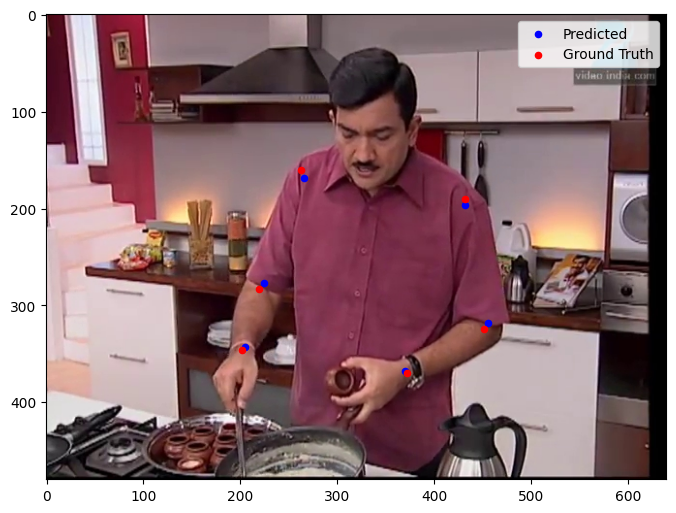

In [65]:
import matplotlib.pyplot as plt
import cv2

def visualize_keypoints(image_path, pred_keypoints, gt_keypoints):
    # 이미지 읽기
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 플롯 설정
    plt.figure(figsize=(8, 8))
    plt.imshow(img)

    # 예측된 키포인트 그리기 (파란색)
    for pred in pred_keypoints:
        plt.scatter(pred[0], pred[1], color='blue', label='Predicted', s=20)

    # 실제 키포인트 그리기 (빨간색)
    for gt in gt_keypoints:
        plt.scatter(gt[0], gt[1], color='red', label='Ground Truth', s=20)

    # 중복되는 범례 항목을 제거하기 위함
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # 플롯 표시
    plt.show()
    
# 이미지 경로와 예측된 키포인트 및 실제 키포인트
image_path = test_image_100[6]
pred_keypoints = vit_pose_result[6]
gt_keypoints =  test_label_100[6]['label'][10: 16]

# 시각화 함수 호출
visualize_keypoints(image_path, pred_keypoints, gt_keypoints)

## Media Pipe evaluation

In [66]:
import mediapipe as mp
import cv2
import numpy as np
from tqdm import tqdm

# MediaPipe 초기화
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

# PCK 계산 함수 (Bounding Box 크기를 기준으로 정규화)
def calculate_pck(predicted, ground_truth, bbox_size, threshold=0.5):
    distances = np.linalg.norm(np.array(predicted) - np.array(ground_truth), axis=1)
    normalized_distances = distances / bbox_size
    return np.mean(normalized_distances < threshold)

# OKS 계산 함수
def compute_oks(predicted, ground_truth, bbox_size, keypoint_sigmas, threshold=0.5):
    """OKS 계산 함수"""
    distances = np.linalg.norm(np.array(predicted) - np.array(ground_truth), axis=1)
    scaled_distances = distances / bbox_size
    oks = np.exp(-scaled_distances**2 / (2 * (keypoint_sigmas ** 2)))
    return np.mean(oks > threshold)

# mAP 계산 함수
def calculate_map(oks_scores, thresholds):
    """mAP(mean Average Precision) 계산 함수"""
    ap_scores = {t: [] for t in thresholds}
    
    # 각 threshold에 대해 AP 계산
    for t in thresholds:
        aps = [oks >= t for oks in oks_scores]
        ap_scores[t] = np.mean(aps)
    
    # mAP 출력
    for t, score in ap_scores.items():
        print(f'mAP @ OKS threshold {t}: {score:.4f}')
    
    return ap_scores

# MediaPipe 평가 함수
def evaluate_mediapipe(image_paths, image_labels, keypoint_sigmas, thresholds):
    total_pck_score = 0
    oks_scores = []  # OKS 저장
    pose_result = []

    # MPII 데이터셋의 왼쪽, 오른쪽 어깨, 팔꿈치, 손목에 해당하는 6개 키포인트 인덱스
    keypoint_indices = {
        'left_shoulder': 11,  # MediaPipe에서 왼쪽 어깨
        'left_elbow': 13,     # MediaPipe에서 왼쪽 팔꿈치
        'left_wrist': 15,     # MediaPipe에서 왼쪽 손목
        'right_shoulder': 12, # MediaPipe에서 오른쪽 어깨
        'right_elbow': 14,    # MediaPipe에서 오른쪽 팔꿈치
        'right_wrist': 16     # MediaPipe에서 오른쪽 손목
    }

    # MPII 데이터셋에서 왼쪽 어깨, 팔꿈치, 손목, 오른쪽 어깨, 팔꿈치, 손목의 인덱스
    mpii_indices = [10, 11, 12, 13, 14, 15]  # MPII에서 어깨, 팔꿈치, 손목에 해당하는 인덱스

    # MediaPipe의 결과와 MPII 포즈 레이블 비교
    for i, img_path in tqdm(enumerate(image_paths)):
        # 이미지 읽기
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # MediaPipe 포즈 추정 수행
        result = pose.process(image_rgb)

        if not result.pose_landmarks:
            # print(f'No pose detected in {img_path, i}')
            pose_result.append([])
            continue

        # MediaPipe의 키포인트 추출
        predicted_kpts = []
        for name, idx in keypoint_indices.items():
            landmark = result.pose_landmarks.landmark[idx]
            predicted_kpts.append([landmark.x * image.shape[1], landmark.y * image.shape[0]])  # (x, y) 좌표 변환

        predicted_kpts = np.array(predicted_kpts)

        # Ground Truth에서 어깨, 팔꿈치, 손목에 해당하는 키포인트만 추출
        label_data = image_labels[i]
        gt_kpts = np.array(label_data['label'])
        gt_kpts_selected = gt_kpts[mpii_indices, :2]  # MPII에서 어깨, 팔꿈치, 손목에 해당하는 좌표만 선택

        # 유효한 Ground Truth 키포인트만 사용
        final_predicted_kpts = []
        final_gt_kpts = []
        for j, (gt_kpt, pred_kpt) in enumerate(zip(gt_kpts_selected, predicted_kpts)):
            if gt_kpt[0] != -1 and gt_kpt[1] != -1:
                final_predicted_kpts.append(pred_kpt)
                final_gt_kpts.append(gt_kpt)
        
        if not final_predicted_kpts or not final_gt_kpts:
            print(f'Skipping {img_path} due to invalid ground truth')
            continue

        # Bounding box 크기 계산 (이미지 크기를 사용하여 Bounding box 크기를 추정)
        bbox_size = max(image.shape[0], image.shape[1])

        # OKS 계산 및 저장
        if len(final_predicted_kpts) == 6 and len(final_gt_kpts) == 6:
            # PCK 계산
            pck_score = calculate_pck(np.array(final_predicted_kpts), np.array(final_gt_kpts), bbox_size)
            total_pck_score += pck_score
            
            oks = compute_oks(final_predicted_kpts, final_gt_kpts, bbox_size, keypoint_sigmas)
            oks_scores.append(oks)

        pose_result.append(final_predicted_kpts)
    
    avg_pck = total_pck_score / len(image_paths) if len(image_paths) > 0 else 0
    print(f'avg_PCK: {avg_pck:.4f}')

    map_score = calculate_map(oks_scores, thresholds)

    return pose_result, map_score

# 사용할 OKS threshold
thresholds = [0.5, 0.75, 0.85]
# 키포인트 가중치 설정 (보통 COCO의 sigmas 값을 사용)
keypoint_sigmas = np.array([0.26, 0.25, 0.35, 0.35, 0.79, 0.79])

mediapipe_pose_result, map_score = evaluate_mediapipe(test_image_100, test_label_100, keypoint_sigmas, thresholds)


I0000 00:00:1729065894.864038   17528 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1729065894.929408   28793 gl_context.cc:357] GL version: 3.0 (OpenGL ES 3.0 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: D3D12 (Intel(R) UHD Graphics)
1000it [00:53, 18.62it/s]

avg_PCK: 0.8827
mAP @ OKS threshold 0.5: 0.9977
mAP @ OKS threshold 0.75: 0.9369
mAP @ OKS threshold 0.85: 0.8557


In [67]:
print(test_image_100[6])

./MPII/images/000041029.jpg


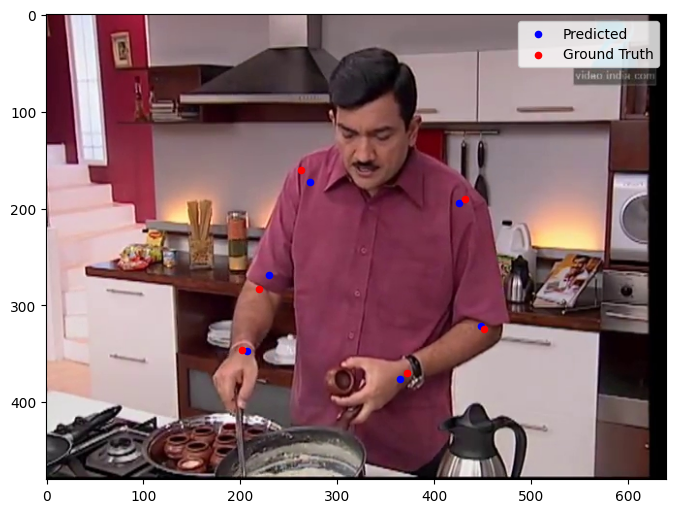

In [68]:
# 이미지 경로와 예측된 키포인트 및 실제 키포인트
image_path = test_image_100[6]
pred_keypoints = mediapipe_pose_result[6]
gt_keypoints =  test_label_100[6]['label'][10: 16]

# 시각화 함수 호출
visualize_keypoints(image_path, pred_keypoints, gt_keypoints)